<a href="https://colab.research.google.com/github/Omaraliouane21/Pre/blob/main/PRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

In [2]:
# Charger les données depuis le fichier Excel
file_path = 'Prevision2023.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Assurer que la colonne 'date' est de type datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Définir la colonne 'date' comme index
df.set_index('date', inplace=True)

In [5]:
# Diviser les données en ensembles d'apprentissage et de test
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [6]:
# Créer le modèle SARIMA
order = (1, 1, 1)  # Paramètres ARIMA
seasonal_order = (1, 1, 1, 12)  # Paramètres saisonniers
model = SARIMAX(df, order=order, seasonal_order=seasonal_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Ajuster le modèle aux données d'entraînement
result = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [8]:
# Faire des prévisions pour l'année 2024
forecast_steps = 12  # 12 mois pour l'année 2024
forecast = result.get_forecast(steps=forecast_steps)

In [9]:
# Extraire les prévisions et les intervalles de confiance
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

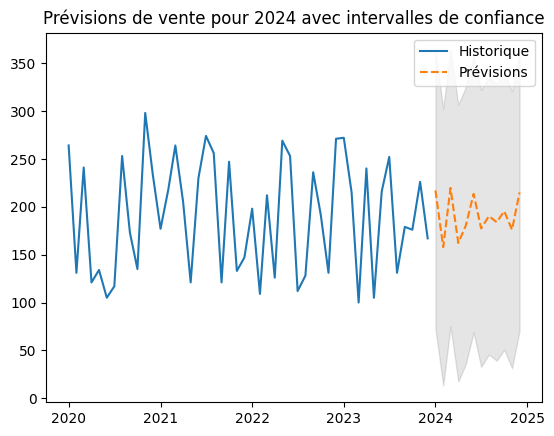

In [10]:
# Visualiser les prévisions
plt.plot(df, label='Historique')
plt.plot(forecast_values, label='Prévisions', linestyle='--')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.1)
plt.title('Prévisions de vente pour 2024 avec intervalles de confiance')
plt.legend()
plt.show()

In [12]:
# Extraire les prévisions et les intervalles de confiance
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [15]:
# Afficher les prévisions dans un tableau
table = pd.DataFrame({'Date': forecast_values.index, 'Prévisions': forecast_values.values})

# Afficher les valeurs de prévisions uniquement
print("\nValeurs de prévisions:")
print(forecast_values)


Valeurs de prévisions:
2024-01-01    217.082639
2024-02-01    157.881214
2024-03-01    219.638244
2024-04-01    162.154025
2024-05-01    180.388617
2024-06-01    213.443895
2024-07-01    177.379960
2024-08-01    190.262819
2024-09-01    183.863525
2024-10-01    195.340164
2024-11-01    175.971021
2024-12-01    214.909363
Freq: MS, Name: predicted_mean, dtype: float64
